In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("coin_data")


In [3]:
df

,Unnamed: 0,open,high,low,close,volume,PE_inc
0,2023-09-26,-1.960013,-2.016807,-1.962381,-2.022373,-0.208034,0.309835
1,2023-09-25,-2.002925,-2.007101,-1.958703,-1.969635,-0.135334,-0.158388
2,2023-09-24,-1.950862,-1.955835,-1.954138,-2.006572,0.509842,1.228496
3,2023-09-23,-1.987105,-2.022431,-1.949934,-1.979360,0.231961,0.000673
4,2023-09-22,-1.960152,-2.018357,-1.995452,-2.036637,0.206258,-0.044906
...,...,...,...,...,...,...,...
293,2022-12-07,0.274655,0.218681,0.346968,0.272578,-0.883700,1.432658
294,2022-12-06,0.278075,0.197306,0.352975,0.272536,-1.264013,-0.671044
295,2022-12-05,0.278268,0.216351,0.280990,0.195993,-1.169575,0.917007
296,2022-12-04,0.201468,0.147832,0.230613,0.205878,-0.713666,-1.297390


In [4]:
df.rename(columns={"Unnamed: 0":"date"},inplace=True)

In [5]:
df.index=pd.to_datetime(df["date"])
df.drop("date",axis=1)

,open,high,low,close,volume,PE_inc
date,,,,,,
2023-09-26,-1.960013,-2.016807,-1.962381,-2.022373,-0.208034,0.309835
2023-09-25,-2.002925,-2.007101,-1.958703,-1.969635,-0.135334,-0.158388
2023-09-24,-1.950862,-1.955835,-1.954138,-2.006572,0.509842,1.228496
2023-09-23,-1.987105,-2.022431,-1.949934,-1.979360,0.231961,0.000673
2023-09-22,-1.960152,-2.018357,-1.995452,-2.036637,0.206258,-0.044906
...,...,...,...,...,...,...
2022-12-07,0.274655,0.218681,0.346968,0.272578,-0.883700,1.432658
2022-12-06,0.278075,0.197306,0.352975,0.272536,-1.264013,-0.671044
2022-12-05,0.278268,0.216351,0.280990,0.195993,-1.169575,0.917007


In [6]:
df1=df[["close"]].copy()

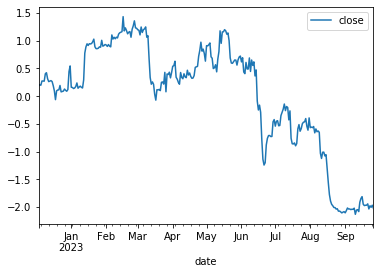

In [7]:
df1.plot()

# by viewing the data, it shows that it is not stationary

# confirming this using dukeyfuller test

In [8]:
from statsmodels.tsa.stattools import adfuller

In [9]:
result=adfuller(df1)

In [10]:
result[1]

0.2708529624044076

# using the difference method to make it stationary

In [11]:
df1_diff=df1-df1.shift(95)

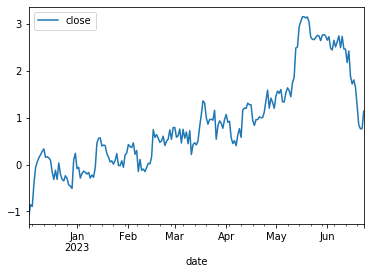

In [12]:
df1_diff.dropna(inplace=True)
df1_diff.plot()

# using fuller test

In [13]:
result=adfuller(df1_diff)
result[1]

0.812436103590512

In [14]:
# from pmdarima import auto_arima
# arma_order=auto_arima(df1_diff,trace=True, suppres_warnings=True)
# arma_order.summary()

In [15]:
train_data=df1.iloc[:200]
test_data=df1.iloc[200:]
# len(test_data),len(train_data)
test_data

,close
date,
2023-03-10,1.090704
2023-03-09,1.063412
2023-03-08,1.249258
2023-03-07,1.214429
2023-03-06,1.198191
...,...
2022-12-07,0.272578
2022-12-06,0.272536
2022-12-05,0.195993


In [16]:
from statsmodels.tsa.arima.model import ARIMA

In [17]:
model=ARIMA(df1,order=(0,0,0))
model_fit=model.fit()

/home/david/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  self._init_dates(dates, freq)
/home/david/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/david/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  self._init_dates(dates, freq)
/home/david/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/david/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarn

In [18]:
# model_fit.summary()

In [19]:
start=len(train_data)
end=len(train_data)+len(test_data)

test_data["forcast"]=model_fit.predict(start=start, end=end-1,dynamic=True)

/home/david/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


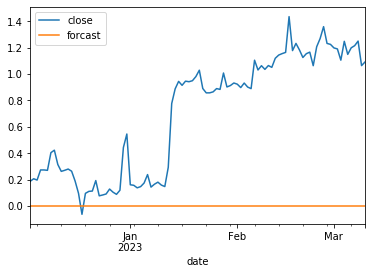

In [20]:
test_data.plot()